# 计算实习题二
> 本次作业中出现的曲线拟合采用了*计算正交多项式再进行拟合*的的方式，正交多项式是递归生成的，每一步都需求化简，不然会出现函数对象不断嵌套的情况，因此使用的符号计算库`simpy`

**报告说明：主要为多项式拟合和FFT两部分，每部分都是 原理解释和代码实现，然后再对相应的实验题求解**

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#正交多项式计算" data-toc-modified-id="正交多项式计算-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>正交多项式计算</a></span><ul class="toc-item"><li><span><a href="#原理" data-toc-modified-id="原理-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>原理</a></span></li><li><span><a href="#实现" data-toc-modified-id="实现-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>实现</a></span></li><li><span><a href="#测试" data-toc-modified-id="测试-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>测试</a></span></li></ul></li><li><span><a href="#利用正交多项式构造拟合曲线" data-toc-modified-id="利用正交多项式构造拟合曲线-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>利用正交多项式构造拟合曲线</a></span><ul class="toc-item"><li><span><a href="#原理" data-toc-modified-id="原理-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>原理</a></span></li><li><span><a href="#实现" data-toc-modified-id="实现-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>实现</a></span></li><li><span><a href="#测试" data-toc-modified-id="测试-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>测试</a></span></li></ul></li><li><span><a href="#课本题目" data-toc-modified-id="课本题目-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>课本题目</a></span><ul class="toc-item"><li><span><a href="#一-对Runge函数求三次拟合，并和前一章计算时系统对比" data-toc-modified-id="一-对Runge函数求三次拟合，并和前一章计算时系统对比-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>一 对Runge函数求三次拟合，并和前一章计算时系统对比</a></span><ul class="toc-item"><li><span><a href="#三次拟合" data-toc-modified-id="三次拟合-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>三次拟合</a></span></li><li><span><a href="#对比" data-toc-modified-id="对比-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>对比</a></span></li></ul></li><li><span><a href="#二-对给出数据进行3，4次的多项式拟合，并依据曲线形状进行拟合" data-toc-modified-id="二-对给出数据进行3，4次的多项式拟合，并依据曲线形状进行拟合-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>二 对给出数据进行3，4次的多项式拟合，并依据曲线形状进行拟合</a></span><ul class="toc-item"><li><span><a href="#3,4次的拟合" data-toc-modified-id="3,4次的拟合-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>3,4次的拟合</a></span></li><li><span><a href="#依据曲线形状假设曲线进行拟合" data-toc-modified-id="依据曲线形状假设曲线进行拟合-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>依据曲线形状假设曲线进行拟合</a></span></li></ul></li></ul></li><li><span><a href="#快速傅里叶变换" data-toc-modified-id="快速傅里叶变换-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>快速傅里叶变换</a></span><ul class="toc-item"><li><span><a href="#原理" data-toc-modified-id="原理-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>原理</a></span></li><li><span><a href="#实现" data-toc-modified-id="实现-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>实现</a></span></li><li><span><a href="#测试" data-toc-modified-id="测试-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>测试</a></span></li></ul></li><li><span><a href="#课本题目" data-toc-modified-id="课本题目-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>课本题目</a></span><ul class="toc-item"><li><span><a href="#求函数-$f(x)=x^2cos(x)$在$[-\pi,-\pi]$的16次三角插值" data-toc-modified-id="求函数-$f(x)=x^2cos(x)$在$[-\pi,-\pi]$的16次三角插值-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>求函数 $f(x)=x^2cos(x)$在$[-\pi, \pi]$的16次三角插值</a></span><ul class="toc-item"><li><span><a href="#FFT求解系数" data-toc-modified-id="FFT求解系数-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>FFT求解系数</a></span></li><li><span><a href="#绘图" data-toc-modified-id="绘图-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>绘图</a></span></li><li><span><a href="#表达式" data-toc-modified-id="表达式-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>表达式</a></span></li></ul></li></ul></li><li><span><a href="#以下为利用程序计算课本题目24的记录" data-toc-modified-id="以下为利用程序计算课本题目24的记录-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>以下为利用程序计算课本题目24的记录</a></span></li></ul></div>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing(use_unicode=True, wrap_line=False, no_global=True)

## 正交多项式计算

### 原理

- 采用递推的方式计算正交多项式
![](./pics/fig_1.png)
其中$\beta_0 = 0$，内积的计算都是使用给定的$x$的采样点，总的就是给定$x$就能计算出需要的正交多项式，因此构造一个类，由输入的$x$计算出正交多项式

### 实现

In [3]:
class OrthogonalPolynomial:
    
    def __init__(self, x, n, wei = None):
        """
        x 为采样点
        n 为计算的多项式最高项系数
        wei 为权函数
        """
        self.__x = Symbol("x") # 多项式变量 x
        self.sampling_x = x
        self.n = n
        if wei == None:
            self.__wei = self.__wei_1
        self.sym_P = [] # 符号函数版本表达式
        self.P = []
        self.__gen_P()
    
    @staticmethod
    def __wei_1(x_):
        """默认权函数为 1 """
        return x_**0
        
    
    def __alpha(self, i):
        """计算 alpha"""
        x = self.sampling_x
        a = np.sum(self.__wei(self.sampling_x) * self.sampling_x * self.P[i-1](x)**2)
        b = np.sum(self.__wei(self.sampling_x) * self.P[i-1](x)**2)
        return a / b
    
    def __beta(self, i):
        """计算 beta"""
        x = self.sampling_x
        a = np.sum(self.__wei(self.sampling_x) * self.P[i](x)**2)
        b = np.sum(self.__wei(self.sampling_x) * self.P[i-1](x)**2)
        return a / b
    
    def __gen_P(self, ):
        self.sym_P = [self.__x**0,]# 符号函数版本表达式
        self.P = [lambdify("x", self.sym_P[-1], "numpy"), ]
        for i in range(1, self.n + 1):
            Alpha = self.__alpha(i)
            if i is 1:
                self.sym_P.append(simplify((self.__x - Alpha) * self.sym_P[0]))
            else:
                Beta = self.__beta(i-1)
                self.sym_P.append(simplify((self.__x - Alpha) * self.sym_P[i - 1] - Beta * self.sym_P[i - 2]))
            self.P.append(lambdify("x", self.sym_P[-1], "numpy"))

### 测试
- 课本上没有例题，使用曲老师课上的例题作为测试
![](./pics/fig_2.png)
- 输入：`1, 2, 3, 4`作为采样点，最高为`2`次多项式  
- 输出：如下，`pretty`格式输出有点问题，直接输出才会有公式的形式

In [4]:
x_test = np.array([1., 2, 3, 4])
y_test = np.array([4., 10, 18, 26])
n = 2
orpo = OrthogonalPolynomial(x_test, n)
for s in orpo.sym_P:
    pprint(s)
orpo.sym_P

1
x - 2.5
         2       
(x - 2.5)  - 1.25


## 利用正交多项式构造拟合曲线

### 原理
- 利用正交多项式的正交性：
![](./pics/fig_3.png)
求解方程
![](./pics/fig_4.png)
将方程表示为矩阵形式，可以发现除了对角线都为0，即系数矩阵为对角阵，这样求解矩阵就特别简单了，即：
![](./pics/fig_5.png)

### 实现

In [5]:
def polynomial_fitting(orpo, x, y, n, wei=None):
    if wei is None:
        wei = lambda x: x**0
    polynomial = 0
    for i in range(n+1):
        a = np.sum(wei(x) * y * orpo.P[i](x)) / np.sum(wei(x) * orpo.P[i](x)**2)
        polynomial += a * orpo.sym_P[i]
    return simplify(polynomial)

### 测试
- 依旧使用前面的例题作为测试样例，因此`x_test`,`y_test`,`n`都不变，第一个参数是前面求出的正交多项式 

In [6]:
polynomial_fitting(orpo, x_test, y_test, n)

- 可以看到结果和例题答案是一致的

## 课本题目

### 一 对Runge函数求三次拟合，并和前一章计算时系统对比

#### 三次拟合

- 数据

In [7]:
# runge函数
def rungeFunc(x_):
    return 1. / (1 + 25 * x_**2)
# 准备好数据
x_test = 0.2 * np.linspace(0, 10, 11) - 1
n = 3
y_test = rungeFunc(x_test)

- 正交多项式

In [8]:
orpo = OrthogonalPolynomial(x_test, n)
for s in orpo.sym_P:
    pprint(s)
orpo.sym_P

1
x - 6.05576195250085e-17
(x - 6.05576195250085e-17)⋅(x + 1.51394048812521e-16) - 0.4
     3                         2                                 
1.0⋅x  + 9.96353996458472e-18⋅x  - 0.712⋅x + 5.12431330209739e-17


> 两种表示方式都给出了，注意其中有很多极小，接近0的数

- 使用正交多项式进行拟合

In [9]:
S_fitting = polynomial_fitting(orpo, x_test, y_test, n)
S_fitting

> 可以看到三次方项和一次方项的系数几乎是0

- 画出拟合曲线

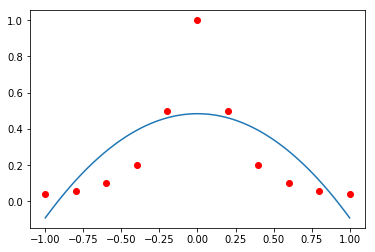

In [10]:
S_fitting = lambdify("x", S_fitting, "numpy")

x_t = np.linspace(-1, 1, 100)
plt.plot(x_test, rungeFunc(x_test), 'ro')
plt.plot(x_t, S_fitting(x_t))
plt.show()

#### 对比

> 可以看到拟合曲线的确不像拟合的样子，为了**验证**一下，**使用numpy自带的多项式拟合进行对比**

In [11]:
z1 = np.polyfit(x_test, y_test, 3)
# 生成多项式对象
p1 = np.poly1d(z1)
print(p1)

           3          2
2.976e-16 x - 0.5752 x - 2.117e-16 x + 0.4841


> 可以看到结果和自己做出来是一致的，所以拟合效果的确不太行。再和前一次作业的效果进行对比，可以发现，除了出现龙格现象的插值，其他几个效果都很好
    ![](./pics/fig_6.png)

### 二 对给出数据进行3，4次的多项式拟合，并依据曲线形状进行拟合

| $x$ | 0.0 | 0.1 | 0.2 | 0.3 | 0.5 | 0.8 | 1.0 |  
| :------| ------: | :------: | :------: | :------: | :------: | :------: | :------: |  
| $y$ | 1.0 | 0.41 | 0.50 | 0.61 | 0.91 | 2.02 | 2.46 |  

#### 3,4次的拟合

- 数据

In [12]:
x_test = np.array([0., 0.1, 0.2, 0.3, 0.5, 0.8, 1.])
y_test = np.array([1., 0.41, 0.5, 0.61, 0.91, 2.02, 2.46])

- 正交多项式 -- 分为两组

In [13]:
n1 = 3
orpo3 = OrthogonalPolynomial(x_test, n1)
orpo3.sym_P

In [14]:
n2 = 4
orpo4 = OrthogonalPolynomial(x_test, n2)
orpo4.sym_P

- 使用正交多项式进行拟合

In [15]:
S_fitting3 = polynomial_fitting(orpo3, x_test, y_test, n1)
S_fitting3
# 三次拟合曲线

In [16]:
S_fitting4 = polynomial_fitting(orpo4, x_test, y_test, n2)
S_fitting4
# 四次拟合曲线

- 拟合曲线

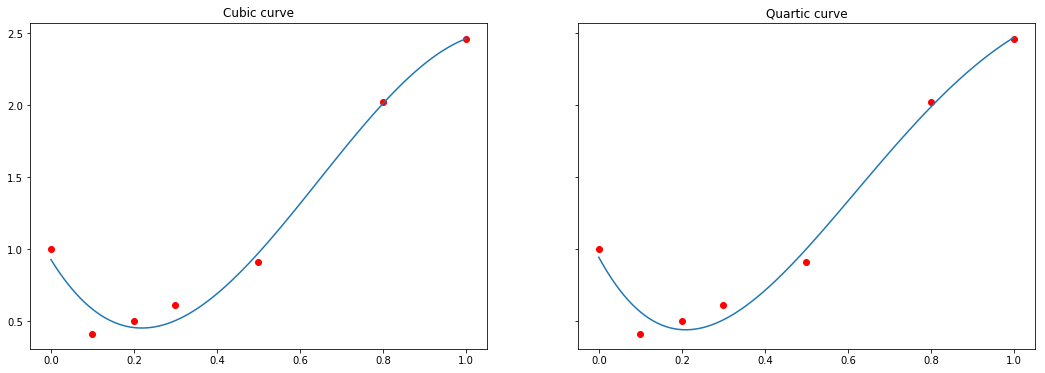

In [17]:
S_fitting3 = lambdify("x", S_fitting3, "numpy")
S_fitting4 = lambdify("x", S_fitting4, "numpy")

x_t = np.linspace(0, 1, 100)
fig, axs = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
axs[0].plot(x_test, y_test, 'ro')
axs[0].plot(x_t, S_fitting3(x_t))
axs[0].set(title="Cubic curve")
axs[1].plot(x_test, y_test, 'ro')
axs[1].plot(x_t, S_fitting4(x_t))
axs[1].set(title="Quartic curve")
plt.show()

#### 依据曲线形状假设曲线进行拟合

## 快速傅里叶变换

### 原理
- 快速傅里叶变换利用了三角函数的周期性节省计算，具体推导有点复杂，课本也给出了具体的算法步骤，因此就直接按照课本流程走了

### 实现

- 对形如下式的计算-->FFT算法，实现为`fft()`
![](./pics/fig_7.png)

In [144]:
def fft(x):
    n = x.size
    # 序列 w 的计算
    w = np.exp(-2 * 1j * np.pi / n * np.arange(0, int(n / 2)))
    # 初始化用于存储的 A 
    A = np.array([x, x])
    p = int(np.log2(n))
    for q in range(1, p + 1):
        if q % 2 == 1:
            for k in range(0, np.power(2,(p - q))):
                for j in range(0, np.power(2, (q - 1))):
                    a = k * np.power(2, q) + j
                    b = k * np.power(2, (q - 1)) + j
                    c = b + np.power(2, (p - 1))
                    A[1][a] = A[0][b] + A[0][c]
                    A[1][a + np.power(2, (q - 1))] = \
                        (A[0][b] - A[0][c]) * w[k * np.power(2, (q - 1))]
        else: # q % 2 != 1:
            for k in range(0, np.power(2, (p - q))):
                for j in range(0, np.power(2, (q - 1))):
                    a = k * np.power(2, q) + j
                    b = k * np.power(2, (q - 1)) + j
                    c = b + np.power(2, (p - 1))
                    A[0][a] = A[1][b] + A[1][c]
                    A[0][a + np.power(2, (q - 1))] = \
                        (A[1][b] - A[1][c]) * w[k * np.power(2, (q - 1))]
    if p % 2 == 1:
        return A[1]
    else:
        return A[0]

- 求得`c`后就能得到复数形式的拟合方程，同时，课本也提供了求解`cos(x)`和`sin(x)`形式的三角拟合多项式
> 下面这个函数使用系数`c`构造三角拟合多项式

In [145]:
def S(x, c):
    n = c.size
    trans = c * np.exp(-1j * np.pi* np.linspace(0, n - 1, n)) / (n/2)
    idx = int(n/2)
    # a = np.concatenate((trans.real[:int(idx/2)], trans.real[idx:idx+int(idx/2)]))
    a = trans.real[:int(n/2)+1]
    a[0] = a[0] / 2
    a[idx] = a[idx] / 2
    # b = -np.concatenate((trans.imag[:int(idx/2)], trans.imag[idx:idx+int(idx/2)]))
    b = -trans.imag[:int(n/2)+1]
    n = b.size
    coeff = np.arange(0, n).reshape(1, -1)
    theta = coeff * x.reshape(-1, 1)
    return np.sum(a * np.cos(theta) + b * np.sin(theta), 1)

### 测试

- 使用课本例题进行测试(P91页)关FFT的一个例题

In [146]:
def f(x):
    return x**4 - 3 * x**3 + 2* x**2 - np.tan(x * (x - 2))
# 将区间映射到标准区间
x_test = np.linspace(0., 7, 8, dtype=complex) / 4
y_test = np.pi * (x_test - 1)
f_test = f(1 + y_test / np.pi)
n = x_test.size

In [147]:
# 由 FFT 算得复数形式的系数c
c = fft(f_test)

In [148]:
# 将复数形式转为a，b
trans = c * np.exp(-1j * np.pi* np.linspace(0, n - 1, n)) / 4
a = trans.real
a[0] = a[0]/2
a[4] = a[4]/2
b = -trans.imag
print("cos(ky)的系数：", a)
print("sin(ky)的系数：", b)

cos(ky)的系数： [ 7.61978706e-01  7.71840821e-01  1.73037012e-02  6.86304133e-03
 -5.78544889e-04  6.86304133e-03  1.73037012e-02  7.71840821e-01]
sin(ky)的系数： [-0.00000000e+00 -3.86373782e-01  4.68750000e-02 -1.13737822e-02
  5.66810517e-19  1.13737822e-02 -4.68750000e-02  3.86373782e-01]


> 可以看到系数和课本答案一致，注意$a_0$应当除以2，通过绘制曲线能更清楚看到：

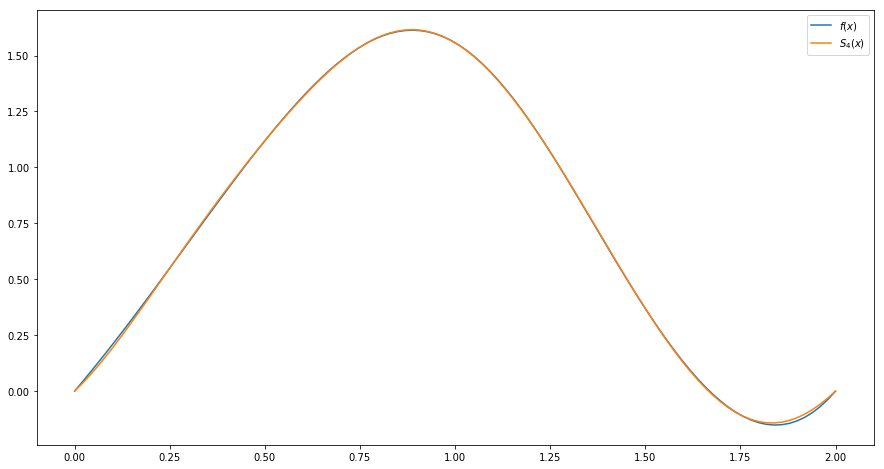

In [149]:
# plt.plot(x_t, S(x_t, c).real)
x_t = np.linspace(0, 2, 100)
y_t = np.pi * (x_t - 1)
f_t = f(1 + y_t / np.pi)
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
ax.plot(x_t, f(x_t), label="$f(x)$")
ax.plot(x_t, S(np.pi * (x_t - 1), c), label="$S_4(x)$")
plt.legend()
plt.show()

## 课本题目

### 求函数 $f(x)=x^2cos(x)$在$[-\pi, \pi]$的16次三角插值

#### FFT求解系数

- 数据

In [150]:
def f(x):
    return x**2*np.cos(x)
# 16次多项式，因此使用了32个点
x_test = np.linspace(-np.pi, np.pi, 33, dtype=complex)[:-1]
y_test = f(x_test)
n = x_test.size

In [151]:
# 由 FFT 算得复数形式的系数c
c = fft(y_test)
c

array([-64.20601372+0.00000000e+00j, -60.84430449-5.77315973e-15j,
       -35.76317927+8.88178420e-16j, -10.20966455+1.70997949e-15j,
        -5.04813136+5.99520433e-15j,  -3.10530322+9.95011466e-16j,
        -2.15431858+3.17497397e-15j,  -1.61609492+1.41049451e-15j,
        -1.28251331+0.00000000e+00j,  -1.06297573+2.45942505e-15j,
        -0.91269655-1.73834313e-15j,  -0.80746798-8.84204858e-16j,
        -0.73334904-5.86310222e-15j,  -0.68197085-2.36864451e-15j,
        -0.64822321-3.23531672e-16j,  -0.62905346+2.34217740e-15j,
        -0.62283407+0.00000000e+00j,  -0.62905346+2.66453526e-15j,
        -0.64822321+2.66453526e-15j,  -0.68197085+7.03905001e-15j,
        -0.73334904+6.43929354e-15j,  -0.80746798+8.98861724e-15j,
        -0.91269655+3.17497397e-15j,  -1.06297573+1.41049451e-15j,
        -1.28251331+0.00000000e+00j,  -1.61609492-1.12715742e-15j,
        -2.15431858-1.81437055e-15j,  -3.10530322-4.57762037e-15j,
        -5.04813136-6.57139565e-15j, -10.20966455-5.83862736e-

In [152]:
# 将复数形式转为a，b
trans = c * np.exp(-1j * np.pi* np.linspace(0, n - 1, n))
a = trans.real
b = trans.imag
print("cos(ky)的系数：", a)
print("sin(ky)的系数：", b)

cos(ky)的系数： [-64.20601372  60.84430449 -35.76317927  10.20966455  -5.04813136
   3.10530322  -2.15431858   1.61609492  -1.28251331   1.06297573
  -0.91269655   0.80746798  -0.73334904   0.68197085  -0.64822321
   0.62905346  -0.62283407   0.62905346  -0.64822321   0.68197085
  -0.73334904   0.80746798  -0.91269655   1.06297573  -1.28251331
   1.61609492  -2.15431858   3.10530322  -5.04813136  10.20966455
 -35.76317927  60.84430449]
sin(ky)的系数： [ 0.00000000e+00  1.32244380e-14 -7.87127418e-15  2.04099042e-15
  3.52233317e-15  9.06438359e-16  1.59200637e-15 -2.50926787e-17
 -1.25650065e-15 -1.28783220e-15 -2.85607404e-15  4.84065678e-15
 -6.94081449e-15  1.03152279e-15 -1.43491394e-15  1.04822192e-15
 -1.22040279e-15 -3.58975598e-15  1.23561520e-15 -3.02937333e-15
  4.64310644e-15 -9.78070732e-15 -5.76913306e-15  5.36002450e-15
 -3.76950196e-15  3.33498564e-16  6.63345729e-15  2.58777027e-14
 -2.38814938e-14  5.82598819e-15 -3.91530878e-13  4.55602390e-13]


#### 绘图

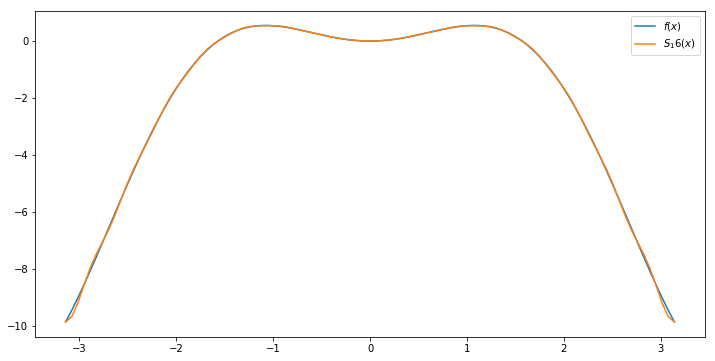

In [153]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
x_t = np.linspace(-np.pi, np.pi, 100)
ax.plot(x_t, f(x_t),label="$f(x)$")
ax.plot(x_t, S(x_t, c), label="$S_16(x)$")
plt.legend()
plt.show()

> 很显然在右边拟合得不是很好，检查函数也没有发现问题，另一方面，拟合的时候如果数据点取的两个边界会导致异常不精确**这是做课本题目的时候发现的**，比如下面的情况，只有采样点改变，不过随着`n`增加，拟合效果会好一点，比如最下面`n=128`时

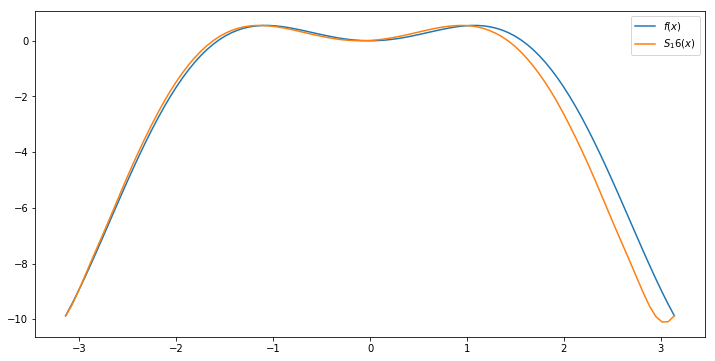

In [154]:
x_test_ = np.linspace(-np.pi, np.pi, 32, dtype=complex)
y_test_ = f(x_test_)
n_ = x_test_.size
# 由 FFT 算得复数形式的系数c
c_ = fft(y_test_)
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
x_t_ = np.linspace(-np.pi, np.pi, 100)
ax.plot(x_t_, f(x_t_),label="$f(x)$")
ax.plot(x_t_, S(x_t_, c_), label="$S_16(x)$")
plt.legend()
plt.show()

#### 表达式
> 下面表达式为上面较为精确的图形的表达式

In [155]:
def S_sym(c):
    n = c.size
    trans = c * np.exp(-1j * np.pi* np.linspace(0, n - 1, n)) / (n/2)
    idx = int(n/2)
    a = trans.real[:int(n/2)+1]
    a[0] = a[0] / 2
    a[idx] = a[idx] / 2
    b = -trans.imag[:int(n/2)+1]
    n = int(c.size / 2) + 1
    ploy = 0
    x = Symbol("x")
    a = np.round(a, 4)
    b = np.round(b, 4)
    for i in range(n):
        ploy += a[i] * cos(i*x) + b[i] * sin(i*x)
    return ploy

In [156]:
S_sym(c)

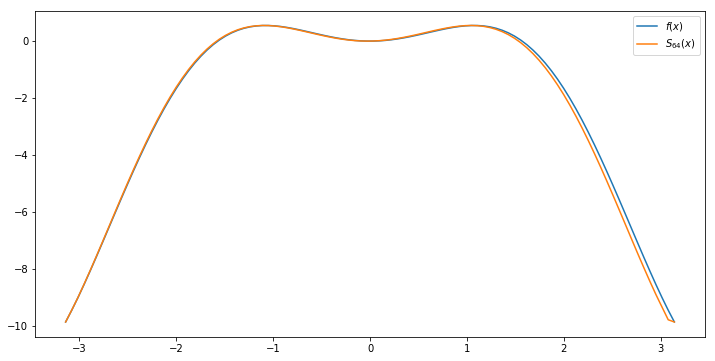

In [157]:
def f(x):
    return x**2*np.cos(x)
x_test = np.linspace(-np.pi, np.pi, 128, dtype=complex)
y_test = f(x_test)
n = x_test.size
# 由 FFT 算得复数形式的系数c
c = fft(y_test)
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
x_t = np.linspace(-np.pi, np.pi, 100)
ax.plot(x_t, f(x_t),label="$f(x)$")
ax.plot(x_t, S(x_t, c), label="$S_{64}(x)$")
plt.legend()
plt.show()

## 以下为利用程序计算课本题目24的记录

In [158]:
# x_test = np.linspace(-np.pi, np.pi, 8, dtype=complex)
x_test = -np.pi + np.pi * np.arange(0, 8, dtype=complex) / 4

In [159]:
def f(x):
    return np.abs(x)
y_test = np.array(f(x_test), dtype=complex)
n = x_test.size
y_test

array([3.14159265+0.j, 2.35619449+0.j, 1.57079633+0.j, 0.78539816+0.j,
       0.        +0.j, 0.78539816+0.j, 1.57079633+0.j, 2.35619449+0.j])

> 在上面使用了`np.abs()`函数，`y`的数据类型改变了，需要显示转换回`complex`，之前没有转换，结果相差很大，因为计算过程中复数部分直接被抛弃了

In [160]:
c = fft(y_test)
c

array([12.56637061+0.00000000e+00j,  5.36303412+0.00000000e+00j,
        0.        +0.00000000e+00j,  0.92015118-1.36024059e-16j,
        0.        +0.00000000e+00j,  0.92015118+0.00000000e+00j,
        0.        +0.00000000e+00j,  5.36303412+1.36024059e-16j])

In [161]:
trans = c * np.exp(-1j * np.pi* np.linspace(0, n - 1, n)) / (n/2)
a = trans.real
a[0] = a[0] / 2
b = trans.imag
print("cos(ky)的系数：", a)
print("sin(ky)的系数：", b)

cos(ky)的系数： [ 1.57079633 -1.34075853  0.         -0.2300378   0.         -0.2300378
  0.         -1.34075853]
sin(ky)的系数： [ 0.00000000e+00 -1.64195564e-16  0.00000000e+00 -5.05085004e-17
  0.00000000e+00 -1.40857525e-16  0.00000000e+00 -1.18337496e-15]


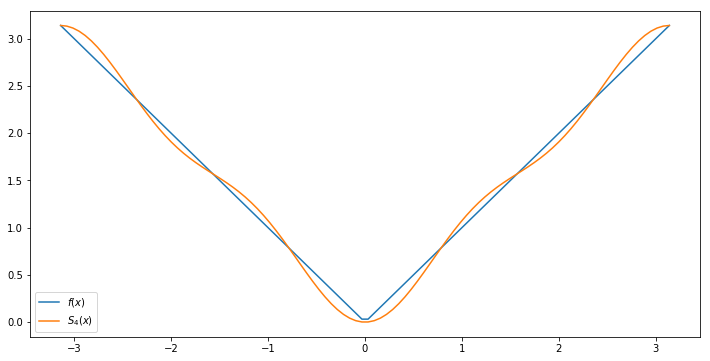

In [162]:
def p(x):
    return 1.570796 - 1.340759 * np.cos(x) - 0.230037 * np.cos(3*x)
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
x_t = np.linspace(-np.pi, np.pi, 100)
ax.plot(x_t, f(x_t),label="$f(x)$")
ax.plot(x_t, S(x_t, c), label="$S_{4}(x)$")
# ax.plot(x_t, p(x_t), label="$P_{4}(x)$")
plt.legend()
plt.show()

- 表达式

In [169]:
S_sym(c)

> 以下为计算过程的一些备份，为以后方便查阅才留着

In [164]:
x_1 = np.linspace(0, 1, 8)
# def f_1(x):
#     return x / (4 + x**2)
def f_1(x):
    return np.exp(-x)
(np.sum(2 * f_1(x_1[1:-1])) + f_1(x_1[0]) + f_1(x_1[-1])) / 14

In [165]:
sum_ = 0
for i in range(x_1.size - 1):
    sum_ += f_1(x_1[i]) + f_1(x_1[i + 1]) + 4*f_1((x_1[i + 1] + x_1[i]) / 2)
sum_ / 42

In [166]:
-1./(180 * 7) * (1. / 2)**4

In [167]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8])
idx = int(a.size/2)
np.concatenate((a[:int(idx/2)], a[idx:idx+int(idx/2)]))

array([1, 2, 5, 6])

In [168]:
w = np.exp(-1j * np.pi / 4.)
w**2 - w**3 + w**5

(-3.3306690738754696e-16+0.4142135623730948j)